In [1]:
import pandas as pd
import numpy as np

from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances


from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
from mpl_toolkits import mplot3d
from pandas.plotting import scatter_matrix

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

import missingno as msno

In [2]:
df = pd.read_csv('dataset/active_individuals.csv')
df.head()

,Unnamed: 0,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
0,1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


Considering the application data, the question is how can we find the healthiest and fastest officers? How can we find the strongest? How can we find the outliers in this datasets?

These questions can be answered by multivariate data analysis techniques.

## What is multivariate analysis about?

Because the data include simultaneous measurement of many variables, this body of methodologies is called multivariate analysis. Multivariate analysis (MVA) includes methods both for describing and exploring such data and for making formal inferences about them.

Some other points:

* MVA is not like regression analysis to create a model for predicting Y based on X. The main goal of MVA is to explore data to understand it better.
* MVA is very broad. It's about a collection of topics such as principal component analysis (PCA), clustering, factor analysis and etc.
* Distributions are multivariate: like multivariate normal distribution.

## MVA Objectives

* Data dimension reduction / simplification

    - For example, **Principal Components Analysis (PCA)** is designed to reduce the number of variables that need to be considered to a small number of variables
(called the principal components) that are linear combinations of the
original variables. 


* Multivariate visualization

    - For example, **Multidimensional Scaling** is a visual representation of distances or dissimilarities between sets of objects (e.g. police applicants). Objects that are more similar (or have shorter distances) are closer together on the graph than objects that are less similar (or have longer distances).


* Sorting and grouping

    - For example, **Cluster Analysis** is concerned with the identification of groups of similar objects.



**Why we need to learn matrix algebra?**

* Convenience: We present a table of data by a matrix notation

* Communication: The language of MVA is based on matrix algebra

In [3]:
# Create 2*3 matrix
l1 = [[2, 3, 1],
      [-1, 0, 4]]
A = np.array(l1)
print(A)
print(A.shape)

[[ 2  3  1]
 [-1  0  4]]
(2, 3)


In [4]:
# Create a Row Vector
V = np.array([-1, 1, 0])
print(V)
print(V.shape)

[-1  1  0]
(3,)


In [5]:
# Create a Column Vector
V = np.array([[-1, 1, 0]]).T
print(V)
print(V.shape)

[[-1]
 [ 1]
 [ 0]]
(3, 1)


In [6]:
A_T = A.T
print(A_T)

[[ 2 -1]
 [ 3  0]
 [ 1  4]]


**Matrix multiplication:**

The matrix product AV is defined only when the number of columns in A is equal to the number of rows in V.

Suppose that A is an i x j matrix, and V is a j x k matrix. 
Then, the matrix product AV results in a matrix, which has i rows and k columns.

In [7]:
np.dot(A, V)

array([[1],
       [1]])

**Elementwise multiplication:**

Both matrices must have the same dimensions. 

In [8]:
Result2 = A * A
Result2

array([[ 4,  9,  1],
       [ 1,  0, 16]])

In [9]:
B = np.array([[1, 1, 1],
              [-1, -1, -2]])
print(B)

[[ 1  1  1]
 [-1 -1 -2]]


Can we do elementwise multiplication of A and B? 

In [10]:
A * B

array([[ 2,  3,  1],
       [ 1,  0, -8]])

Can we do matrix multiplication of A and B?

In [11]:
# np.dot(A,B)
# No shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

Can we do matrix multiplication of A and B$^T$?

In [12]:
np.dot(A,B.T)

array([[ 6, -7],
       [ 3, -7]])

**Determinant**: 

Determinant is a unique number associated with a square matrix.  
If determinant of matrix is 0, cannot find inverse of the matrix. 
If row or column are multiples, rows are parallel to each other and determinant is zero, then system equation is not solvable.

In [13]:
C = np.array([[1, 2],
              [3, 4]])
print(C)
print(np.linalg.det(C))

[[1 2]
 [3 4]]
-2.0000000000000004


**Trace of Matrix:**

The trace of a matrix is the sum of the diagonal terms, which is only
defined for a square matrix.  
Used in PCA, when we find covariance matrix.  
Matrix and its transpose have same trace

In [14]:
print(np.trace(C))
print(np.diag(C))

5
[1 4]


**Matrix inverse:**

Matrix inversion is analogous to the ordinary arithmetic process of division. For a scalar $k$, it is of course true that $k \times k^{-1}=1$. In a similar way, if C is a square matrix, then

$$C \times C^{-1}=I$$

In [15]:
C_inv = np.linalg.inv(C)
print(C_inv)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [16]:
np.dot(C, C_inv)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

**Covariances**

The covariance of two random variables is a measure of their *linear dependence*.  The population (theoretical) covariance of two random variables, $X_i$ and $X_j$, is a measure of the expected joint variability of two random variables. defined by 
$$Cov(X_i, X_j) = \sigma_{ij} = E((X_i-\mu_i)(X_j-\mu_j)),$$
where $\mu_i = E(X_i)$ and $\mu_j = E(X_j)$ 

In [17]:
df.che_de.cov(df.wri_di)

1.4448174567907

* If $i = j$, we note that the covariance of the variable with itself is simply its variance ($\sigma^2_{i} = E((X_i-\mu_i)^2)$), and therefore there is no need to define variances and covariances independently in the multivariate case. 

In [18]:
# Covariance with itself, is equivalent to variance of the variable
print('Covar with itself : ', df.che_de.cov(df.che_de))
print('Variance of variable: ', df.che_de.var())

Covar with itself :  6.329637018499894
Variance of variable:  6.329637018499894


* If $X_i$ and $X_j$ are independent of each other, their covariance is necessarily equal to zero. Larger values of the covariance imply a greater degree of linear dependence between two variables.

* Covariance is a non-directional statistics, $Cov(X_i, X_j) = Cov(X_j, X_i)$.

In [19]:
print(df.che_de.cov(df.wri_di))
print(df.wri_di.cov(df.che_de))

1.4448174567907
1.4448174567907


* We can create a symmetric square matrix to show the covariance between multiple variables. The notation we use for covariance matrix is $\Sigma$. 

In [20]:
df[['che_de', 'bit_di','elb_di']].cov()

,che_de,bit_di,elb_di
che_de,6.329637,2.414541,2.264299
bit_di,2.414541,4.124618,1.444592
elb_di,2.264299,1.444592,1.830354


Can we report separated covariance matrix for each gender?

In [21]:
female = df[['che_de', 'bit_di','elb_di']][df.sex == 0].cov()
print(female)

          che_de    bit_di    elb_di
che_de  3.356457  1.315545  0.554524
bit_di  1.315545  4.199133  0.979727
elb_di  0.554524  0.979727  0.699519


In [22]:
male = df[['che_de', 'bit_di','elb_di']][df.sex == 1].cov()
print(male)

          che_de    bit_di    elb_di
che_de  4.595161  1.891127  0.756824
bit_di  1.891127  3.478714  0.793509
elb_di  0.756824  0.793509  0.778883


**Correlations**

Standardized format of covariance.  
The covariance is often difficult to interpret because it depends on the scales on which the two variables are measured; consequently, it is often standardized by dividing by the product of the standard deviations of the two variables to give a quantity called the correlation coefficient.

$$Corr(X_i, X_j) = \rho_{ij} = \frac{Cov(X_i, X_j)}{\sigma_{i}\sigma_j}$$

In [23]:
df.che_de.corr(df.wri_di)

0.6081147399691064


* We can create a symmetric square matrix to show the correlation between multiple variables. The notation we use for covariance matrix is $R$. 

In [24]:
df[['che_de', 'bit_di','elb_di']].corr()

,che_de,bit_di,elb_di
che_de,1.000000,0.472556,0.665238
bit_di,0.472556,1.000000,0.525758
elb_di,0.665238,0.525758,1.000000


**Distances**

For some multivariate techniques such as multidimensional scaling and cluster analysis, the concept of distance between the units in the data is often of considerable interest and importance. So, given the variable values for two units, say unit $i$ and unit $j$, what serves as a measure of distance between them? The most common measure used is Euclidean distance.

$$d_{ij} = \sqrt{\sum_{k=1}^q(x_{ik}-x_{jk})^2}$$

In [25]:
# euclidean distance between observations 
distance.euclidean(df.che_de, df.wri_di)

201.04902387228842

In [26]:
distances = pdist(df[['che_de', 'bit_di','elb_di']].values, metric='euclidean')
dist_matrix = squareform(distances)
dist_matrix

array([[0.        , 2.33452351, 3.75765885, ..., 6.9       , 2.98831056,
        3.69188299],
       [2.33452351, 0.        , 4.00624512, ..., 9.03327183, 2.63058929,
        5.73236426],
       [3.75765885, 4.00624512, 0.        , ..., 9.51472543, 5.92705661,
        4.35775171],
       ...,
       [6.9       , 9.03327183, 9.51472543, ..., 0.        , 8.44037914,
        5.48270006],
       [2.98831056, 2.63058929, 5.92705661, ..., 8.44037914, 0.        ,
        6.57114906],
       [3.69188299, 5.73236426, 4.35775171, ..., 5.48270006, 6.57114906,
        0.        ]])

In [27]:
# euclidean distance between rows 
dist = pdist(df[1:6].values, metric='euclidean')
dist_mtrx = squareform(dist)
dist_mtrx

array([[ 0.        , 23.73541658, 16.32482772, 17.13592717, 16.59698768],
       [23.73541658,  0.        , 19.50922859, 14.06022759, 17.20668475],
       [16.32482772, 19.50922859,  0.        , 11.6447413 , 19.18124084],
       [17.13592717, 14.06022759, 11.6447413 ,  0.        , 16.53541654],
       [16.59698768, 17.20668475, 19.18124084, 16.53541654,  0.        ]])

In [28]:
df1 = df.loc[[0, 1, 2, 3, 4], ['che_de']]
df1

,che_de
0,17.7
1,16.9
2,20.9
3,18.4
4,21.5


In [29]:
# euclidean distance for df1
dist = pdist(df1.values, metric='euclidean')
dist_mtrx = squareform(dist)
dist_mtrx

array([[0. , 0.8, 3.2, 0.7, 3.8],
       [0.8, 0. , 4. , 1.5, 4.6],
       [3.2, 4. , 0. , 2.5, 0.6],
       [0.7, 1.5, 2.5, 0. , 3.1],
       [3.8, 4.6, 0.6, 3.1, 0. ]])

Euclidean distances depend on measurements scales so, we should standardize data before finding distances

In [30]:
std_scaler = StandardScaler()
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)
df_std.head()

,Unnamed: 0,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
0,-1.728638,1.337830,-0.830250,-0.236813,-0.607161,0.009578,-0.211019,-0.151154,-0.007911,0.189939,...,0.313564,0.020158,-0.651230,0.148231,0.721636,0.291804,-0.956502,-0.266080,0.303920,1.025978
1,-1.721805,1.599600,0.303984,0.748937,-0.925456,1.031869,0.454873,1.332794,1.329120,0.992429,...,0.761387,0.727425,0.113592,0.499744,1.259126,0.654237,-0.748147,0.198946,0.442248,1.025978
2,-1.714973,0.421634,0.167876,0.650362,0.666017,1.360463,0.380885,0.378827,0.660605,0.189939,...,0.525691,1.010332,0.304797,0.429441,-0.138348,0.581750,-0.227259,0.866483,2.378846,1.025978
3,-1.708140,1.795928,0.939155,0.995374,-0.328653,0.082599,0.380885,0.696816,1.551959,0.912180,...,-0.039980,0.090885,0.304797,-0.449339,0.452891,0.364291,-0.748147,0.258949,1.634001,1.025978
4,-1.701308,1.206945,0.939155,0.995374,0.904738,0.520723,1.342729,1.120801,1.403400,0.831931,...,0.195716,0.868878,0.572485,0.886407,1.205377,1.379101,-0.852325,0.723975,1.708485,1.025978


In [31]:
distances_std = pdist(df_std[['che_de', 'bit_di','elb_di']].values, metric='euclidean')
dist_matrix_std = squareform(distances_std)
dist_matrix_std

array([[0.        , 1.23143282, 1.6608472 , ..., 3.45262213, 1.43189339,
        1.64971375],
       [1.23143282, 0.        , 1.59623869, ..., 4.58554181, 1.6377997 ,
        2.65621631],
       [1.6608472 , 1.59623869, 0.        , ..., 4.68983437, 2.64184105,
        2.16058537],
       ...,
       [3.45262213, 4.58554181, 4.68983437, ..., 0.        , 4.1191662 ,
        2.66193562],
       [1.43189339, 1.6377997 , 2.64184105, ..., 4.1191662 , 0.        ,
        2.98080709],
       [1.64971375, 2.65621631, 2.16058537, ..., 2.66193562, 2.98080709,
        0.        ]])

In [32]:
distances_std = pdist(df[['che_de', 'bit_di','elb_di']].values, metric='seuclidean')
dist_matrix_std = squareform(distances_std)
dist_matrix_std

array([[0.        , 1.23021779, 1.65920847, ..., 3.4492155 , 1.43048057,
        1.64808601],
       [1.23021779, 0.        , 1.59466372, ..., 4.58101734, 1.63618372,
        2.65359547],
       [1.65920847, 1.59466372, 0.        , ..., 4.68520701, 2.6392344 ,
        2.15845356],
       ...,
       [3.4492155 , 4.58101734, 4.68520701, ..., 0.        , 4.1151019 ,
        2.65930915],
       [1.43048057, 1.63618372, 2.6392344 , ..., 4.1151019 , 0.        ,
        2.97786599],
       [1.64808601, 2.65359547, 2.15845356, ..., 2.65930915, 2.97786599,
        0.        ]])

In [33]:
pairwise_distances(df1, metric='euclidean')

array([[0. , 0.8, 3.2, 0.7, 3.8],
       [0.8, 0. , 4. , 1.5, 4.6],
       [3.2, 4. , 0. , 2.5, 0.6],
       [0.7, 1.5, 2.5, 0. , 3.1],
       [3.8, 4.6, 0.6, 3.1, 0. ]])

### Types of missing values

Types of Missing data
Before dealing with the missing values, it is necessary to understand the category of missing values. There are 3 major categories of missing values.

Missing Completely at Random(MCAR):
A variable is missing completely at random (MCAR)if the missing values on a given variable (Y) don’t have a relationship with other variables in a given data set or with the variable (Y) itself. In other words, When data is MCAR, there is no relationship between the data missing and any values, and there is no particular reason for the missing values.

Missing at Random(MAR):
Let’s understands the following examples:

Women are less likely to talk about age and weight than men.

Men are less likely to talk about salary and emotions than women.

familiar right?… This sort of missing content indicates missing at random.

MAR occurs when the missingness is not random, but there is a systematic relationship between missing values and other observed data but not the missing data.

Let me explain to you: you are working on a dataset of ABC survey. You will find out that many emotion observations are null. You decide to dig deeper and found most of the emotion observations are null that belongs to men’s observation.

Missing Not at Random(MNAR):
The final and most difficult situation of missingness. MNAR occurs when the missingness is not random, and there is a systematic relationship between missing value, observed value, and missing itself. To make sure, If the missingness is in 2 or more variables holding the same pattern, you can sort the data with one variable and visualize it.

Reference: https://www.analyticsvidhya.com/blog/2021/10/how-to-deal-with-missing-data-using-python/

In [34]:
df_mno = pd.read_csv('dataset/missing_values.csv')
df_mno.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [35]:
miss_val = df_mno.isna().sum()
mis_val_per = miss_val/len(df_mno)*100
mis_val_table = pd.concat([miss_val, mis_val_per], axis = 1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
Outlet_Size,1606.0,28.3
Item_Weight,976.0,17.2
Item_Identifier,NaN,NaN
Item_Fat_Content,NaN,NaN
Item_Visibility,NaN,NaN
Item_Type,NaN,NaN
Item_MRP,NaN,NaN
Outlet_Identifier,NaN,NaN
Outlet_Establishment_Year,NaN,NaN
Outlet_Location_Type,NaN,NaN


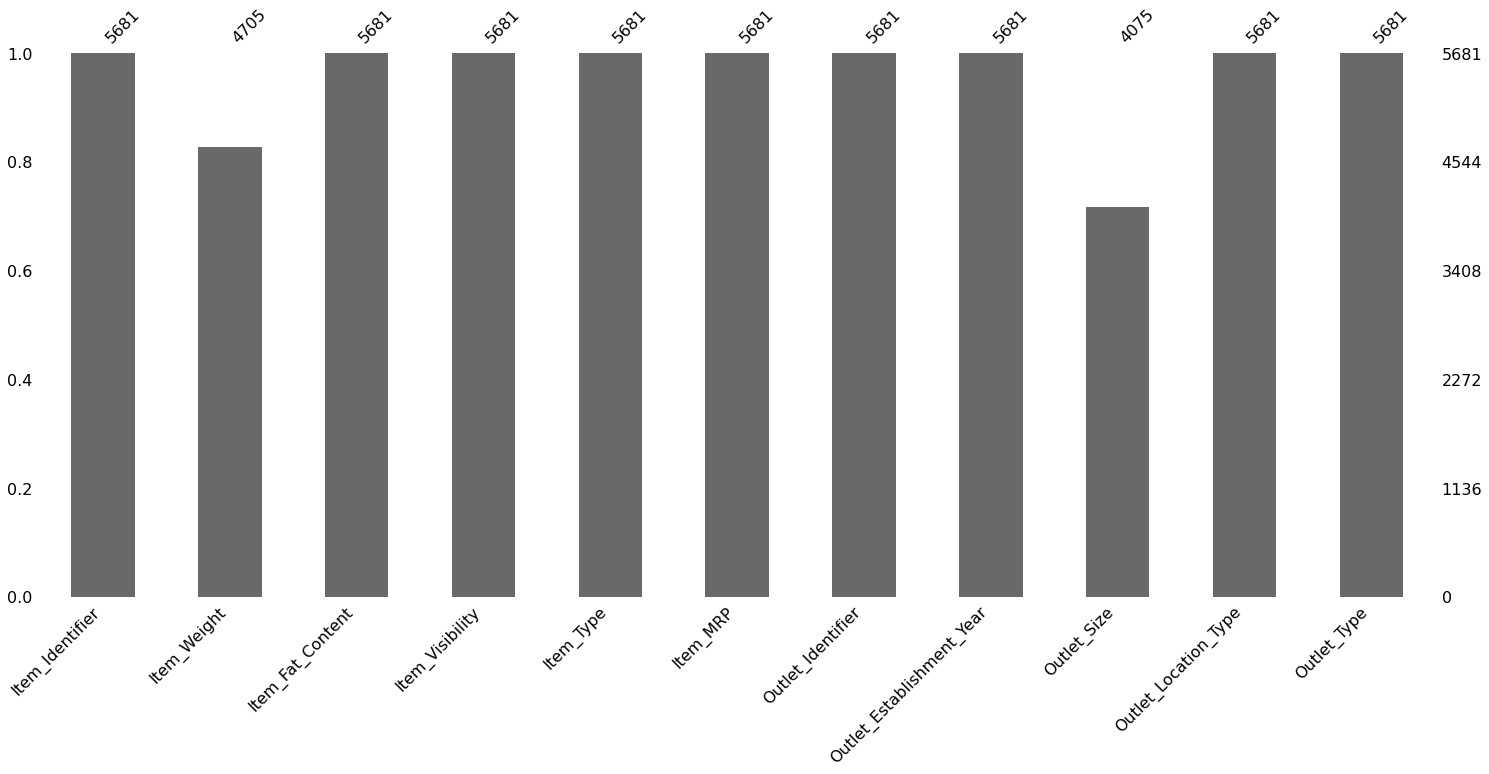

In [36]:
msno.bar(df_mno)

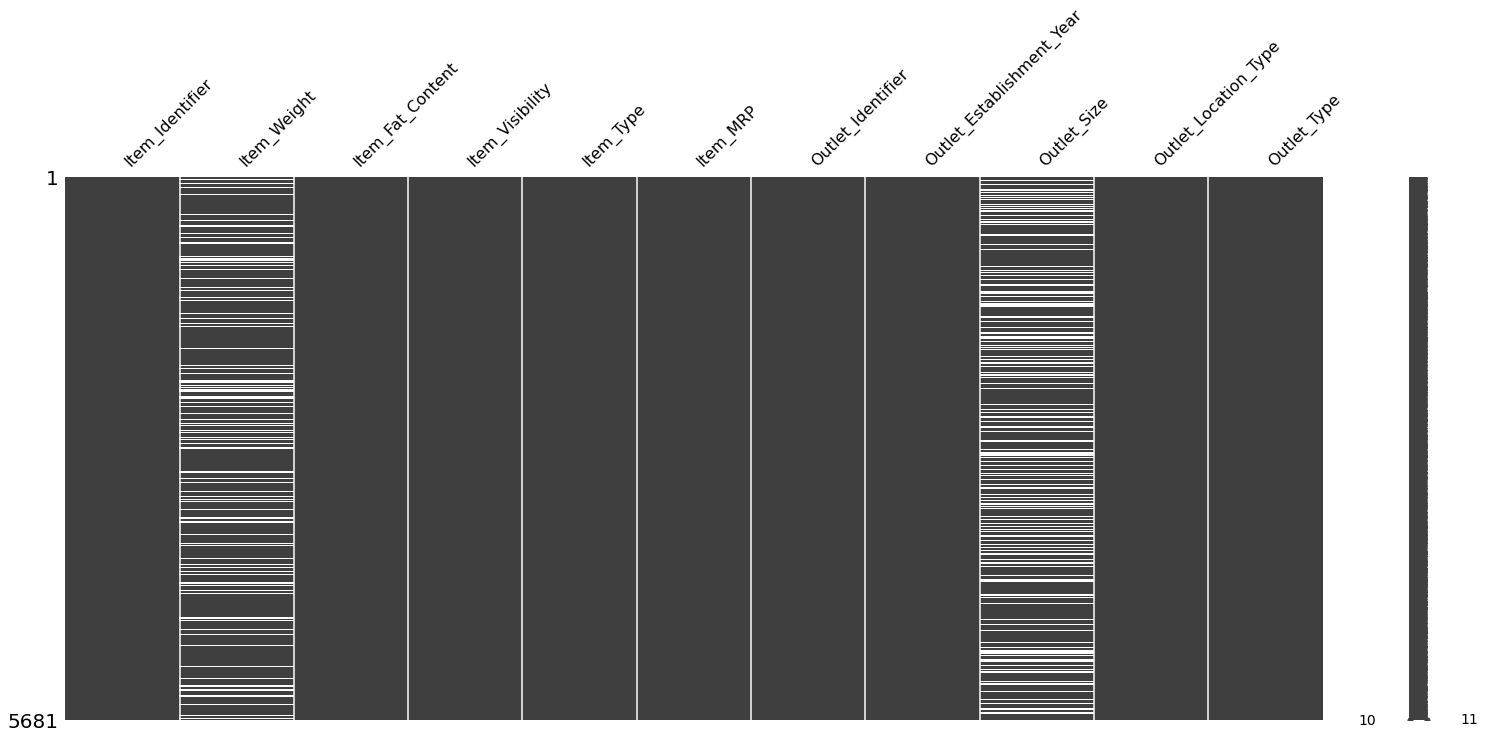

In [37]:
# The msno.matrix() is a nullity matrix that will help to visualize the location of the null observations.
msno.matrix(df_mno)
# The plot appears white wherever there are missing values.
# Once you get the location of the missing data, you can easily find out the type of missing data.

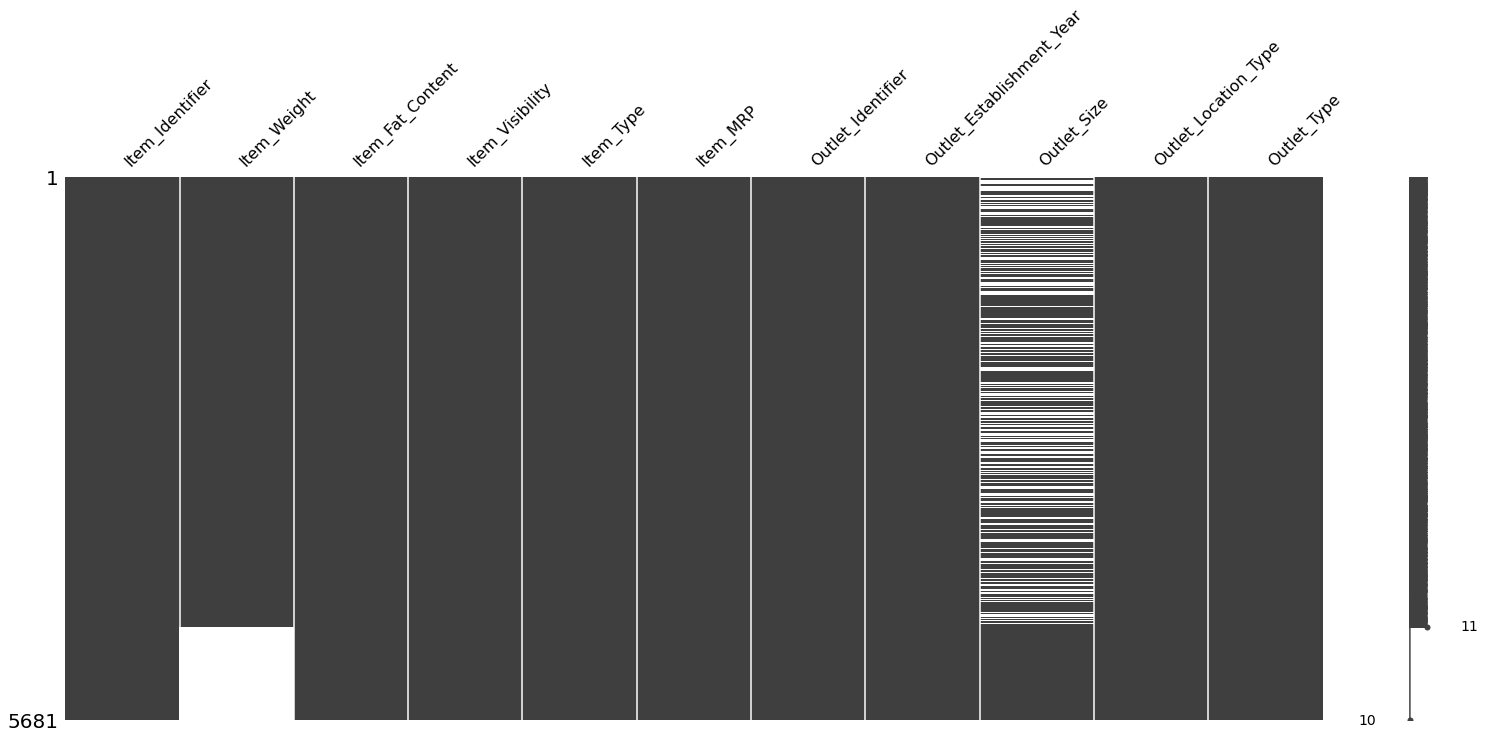

In [38]:
sorted_df = df_mno.sort_values('Item_Weight')
msno.matrix(sorted_df)
# chart shows the relationship between Item_Weight and Outlet_Size.

In [39]:
data = df_mno.loc[(df_mno["Outlet_Establishment_Year"] == 1985)]
data
# chart shows that all the Item_Weight are null that belongs to the 1985 establishment year.
# The Item_Weight is null that belongs to Tier3 and Tier1, 
# which have outlet_size medium, low, and contain low and regular fat. 
# This missingness is a kind of Missing at Random case(MAR) 
# as all the missing Item_Weight relates to one specific year.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
12,NCC54,NaN,Low Fat,0.171079,Health and Hygiene,240.4196,OUT019,1985,Small,Tier 1,Grocery Store
18,NCM42,NaN,Low Fat,0.028184,Household,109.6912,OUT027,1985,Medium,Tier 3,Supermarket Type3
23,NCL19,NaN,Low Fat,0.027447,Others,142.3470,OUT019,1985,Small,Tier 1,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3
5661,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3
5665,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3


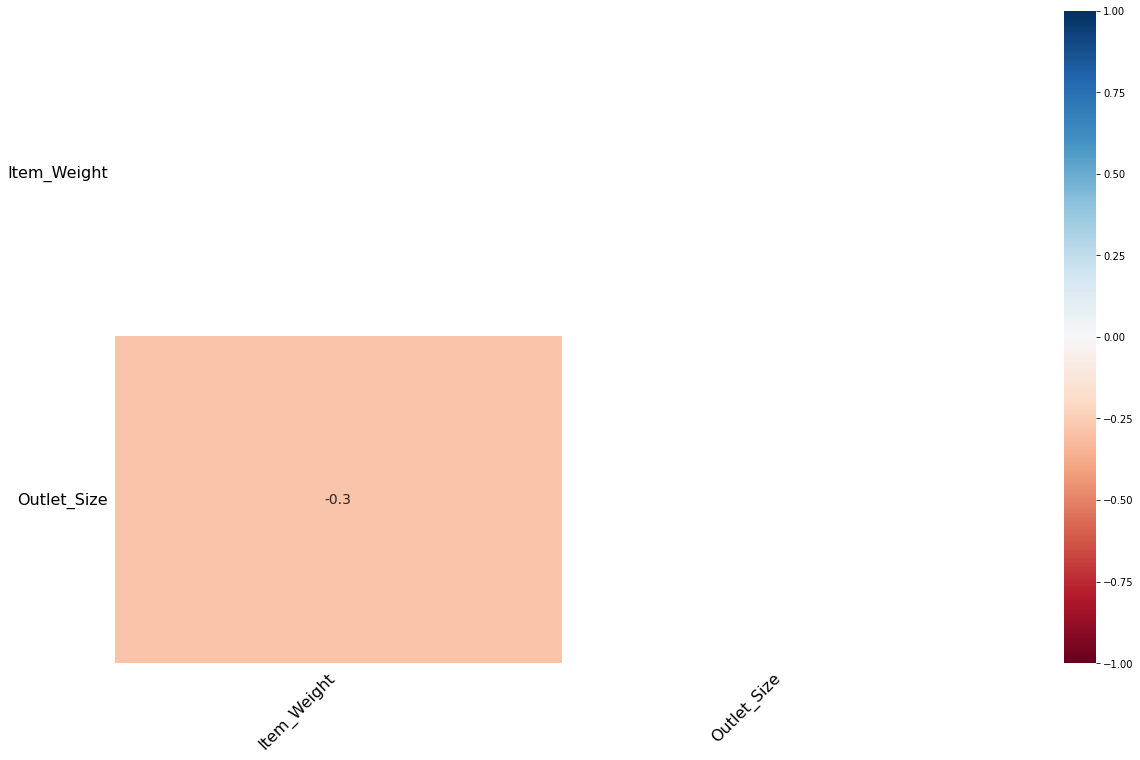

In [40]:
msno.heatmap(df_mno)
# Item_Weight has a negative(-0.3) correlation with Outlet_Size.

### Treat missing values

#### Listwise deletion:

Listwise deletion is preferred when there is a **Missing Completely at Random case (MCAR)** . In Listwise deletion entire rows(which hold the missing values) are deleted. It is also known as **complete-case analysis** as it removes all data that have one or more missing values.  
Listwise deletion is not preferred if the size of the dataset is small as it removes entire rows if we eliminate rows with missing data then the dataset becomes very short and the machine learning model will not give good outcomes on a small dataset.

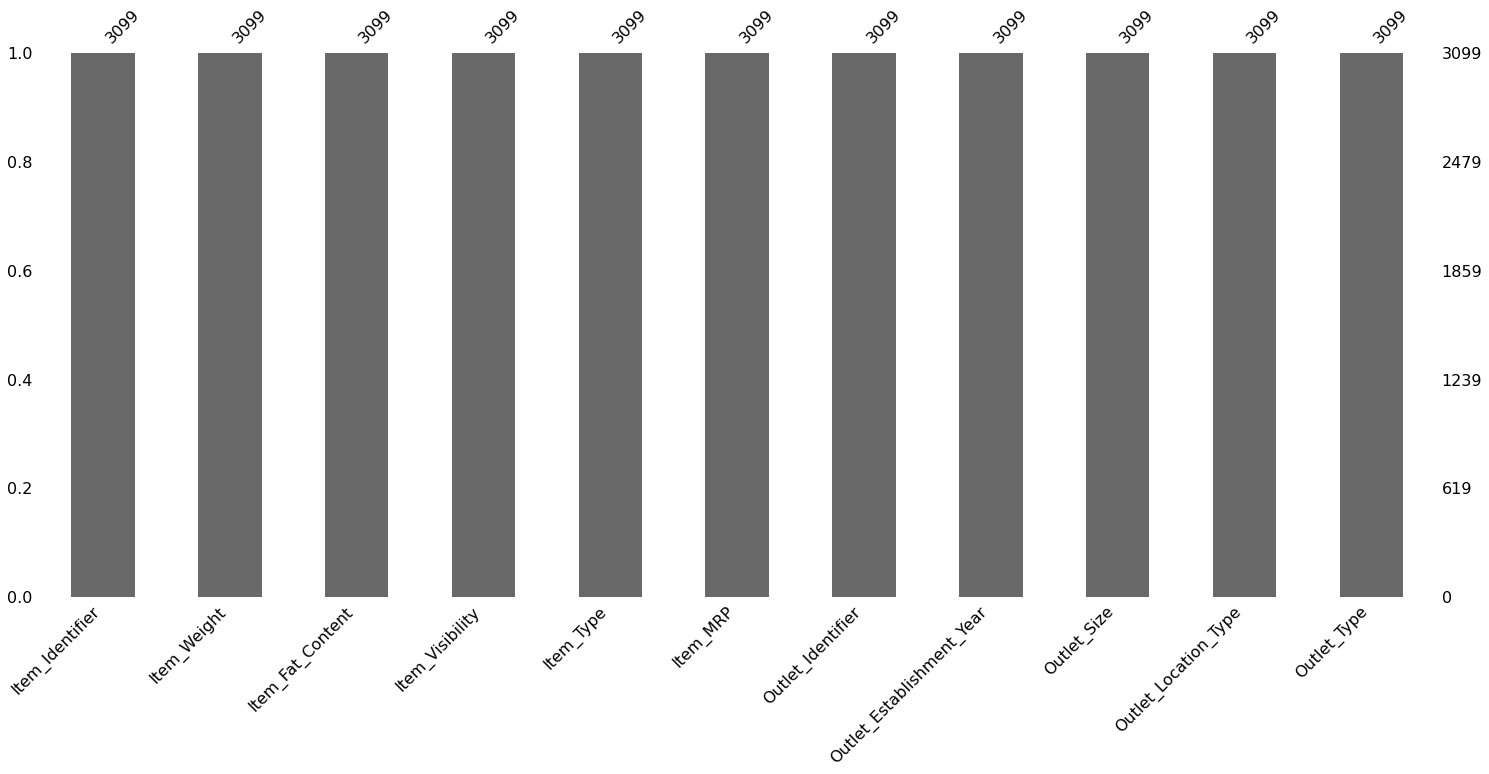

In [41]:
df_mno1 = df_mno.copy()
df_mno1.dropna(inplace = True)
msno.bar(df_mno1)

#### Pairwise Deletion:

Pairwise Deletion is used if missingness is missing completely at random i.e MCAR.  
Pairwise deletion is preferred to reduce the loss that happens in Listwise deletion. It is also called an **available-case analysis** as it removes only null observation, not the entire row.
All methods in pandas like mean, sum, etc. intrinsically skip missing values.

In [42]:
df_mno2 = df_mno.copy()
df_mno2['Item_Weight'].mean()

12.695633368756642

#### Dropping complete columns

If a column holds a lot of missing values, say more than 80%, and the feature is not meaningful, that time we can drop the entire column.

### Imputation techniques:

Replaces the missing values with either zero or any constant value.  
The syntax is the same as imputation with constant only the SimpleImputer strategy will change. It can be “Mean” or “Median” or “Most_Frequent”.

“Mean” will replace missing values using the mean in each column. It is preferred if data is numeric and not skewed.

“Median” will replace missing values using the median in each column. It is preferred if data is numeric and skewed.

“Most_frequent” will replace missing values using the most_frequent in each column. It is preferred if data is a string(object) or numeric.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

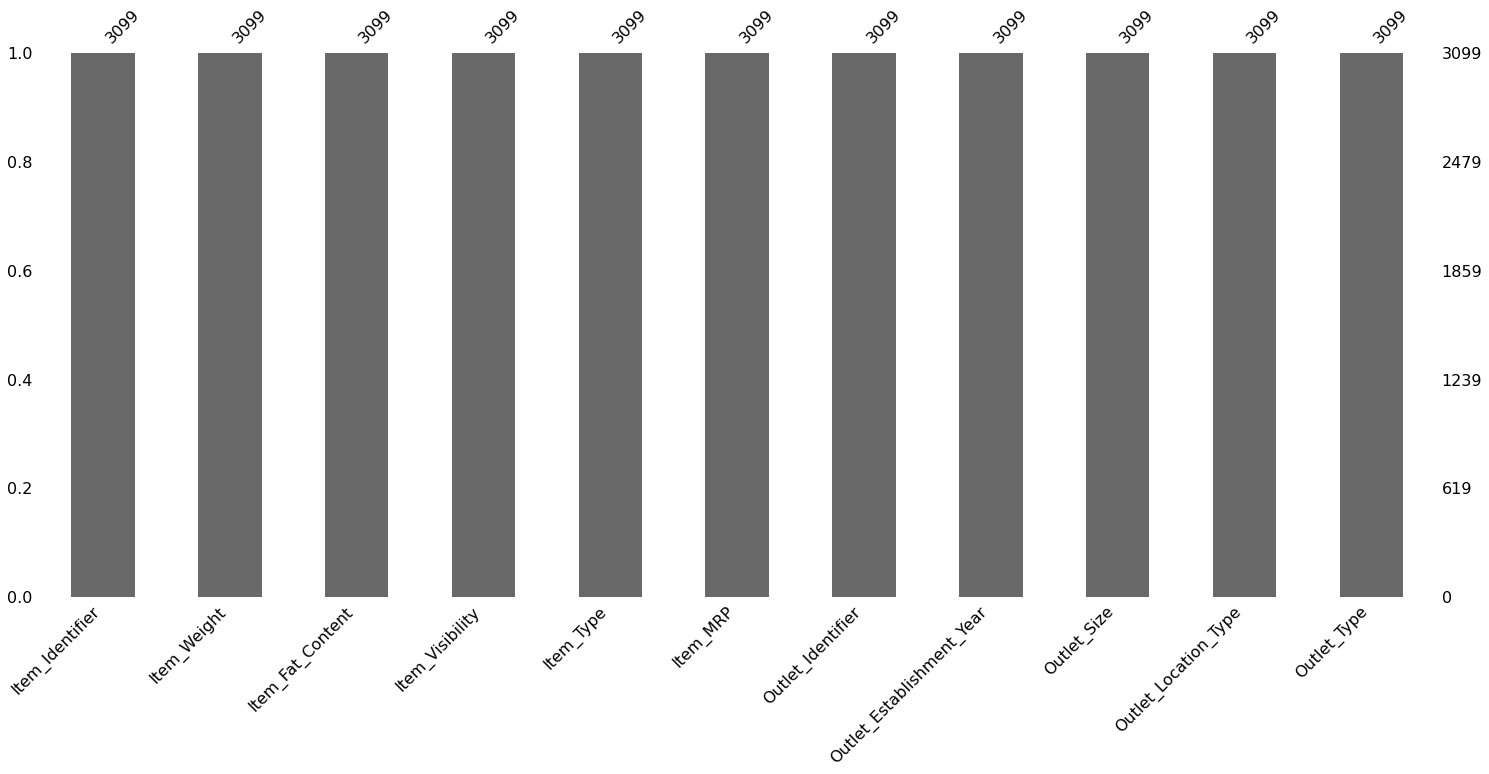

In [43]:
df_constant = df_mno.copy()
#setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy='constant') # imputing using constant value
df_constant.iloc[:,:] = mean_imputer.fit_transform(df_constant)
msno.bar(df_mno1)
df_constant.isnull().sum()

float64


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

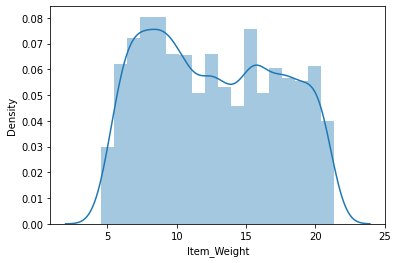

In [44]:
print(df_mno['Item_Weight'].dtype)
sns.distplot(df_mno['Item_Weight'])
# Item_Weight column satisfying both conditions numeric type 
# and doesn’t have skewed(follow Gaussian distribution). 
# here, we can use any strategy.
df_most_frequent = df_mno.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df_most_frequent.iloc[:,:] = mean_imputer.fit_transform(df_most_frequent)
df_most_frequent.isnull().sum()

## Advanced Imputation Technique:  
### K_Nearest Neighbor Imputation

The KNN algorithm helps to impute missing data by finding the closest neighbors using the **Euclidean distance** metric to the observation with missing data and imputing them based on the non-missing values in the neighbors.  
The fundamental weakness of KNN **doesn’t work on categorical features**. We need to convert them into numeric using any encoding method. It **requires normalizing data** as KNN Imputer is a distance-based imputation method and different scales of data generate biased replacements for the missing values.

In [45]:
df_knn = df_mno.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_knn['Item_Weight'] = knn_imputer.fit_transform(df_knn[['Item_Weight']])
df_knn['Item_Weight'].isnull().sum()

0

## Detecting Outliers

### By visualization

In [46]:
df_usairpol = pd.read_csv('dataset/USairpollution.csv')
df_usairpol.head()

,Unnamed: 0,SO2,temp,manu,popul,wind,precip,predays
0,Albany,46,47.6,44,116,8.8,33.36,135
1,Albuquerque,11,56.8,46,244,8.9,7.77,58
2,Atlanta,24,61.5,368,497,9.1,48.34,115
3,Baltimore,47,55.0,625,905,9.6,41.31,111
4,Buffalo,11,47.1,391,463,12.4,36.11,166


[Text(0.5, 1.0, 'SCATTER'),
 Text(0.5, 0, 'Number of Manufacturing Enterprises'),
 Text(0, 0.5, 'Population size (1970 census) in thousands')]

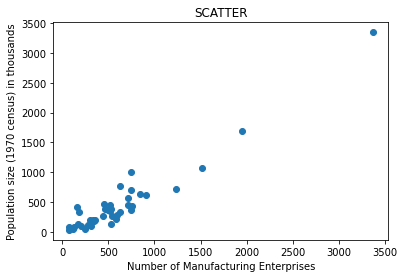

In [47]:
plt.plot(df_usairpol.popul, df_usairpol.manu, 'o')
plt.gca().update(dict(title='SCATTER', xlabel='Number of Manufacturing Enterprises', 
                      ylabel='Population size (1970 census) in thousands'))

[Text(0.5, 1.0, 'SCATTER'),
 Text(0.5, 0, 'Number of Manufacturing Enterprises'),
 Text(0, 0.5, 'Population size (1970 census) in thousands')]

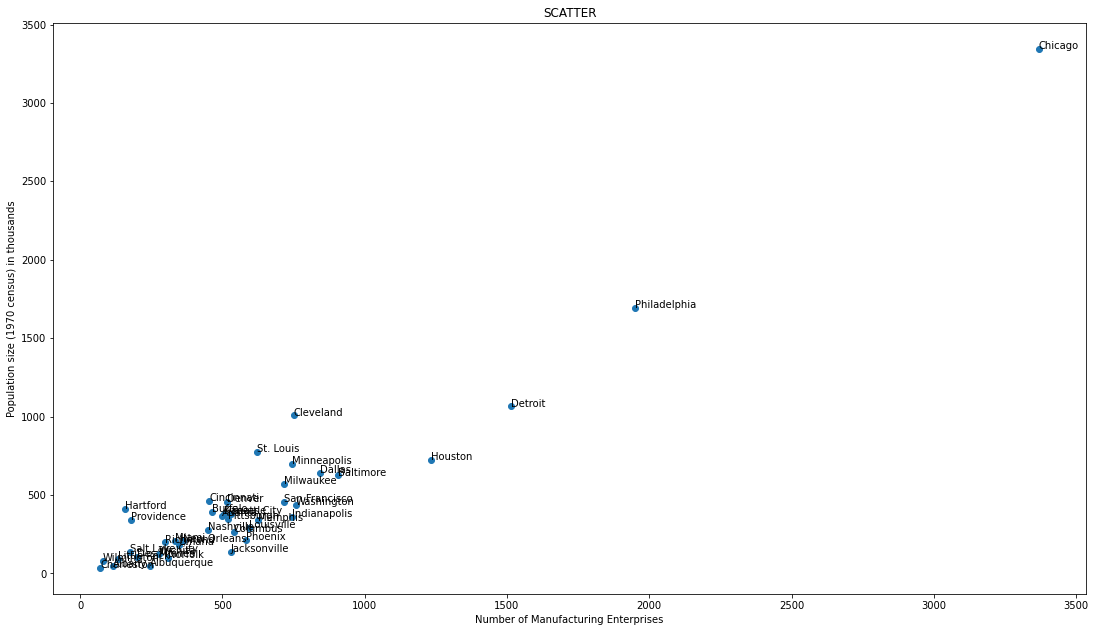

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(df_usairpol.popul, df_usairpol.manu)
for i, txt in enumerate(df_usairpol.iloc[:,0]):
    ax.annotate(txt, (df_usairpol.popul[i], df_usairpol.manu[i]))
plt.gca().update(dict(title='SCATTER', xlabel='Number of Manufacturing Enterprises', 
                      ylabel='Population size (1970 census) in thousands'))
# As we see , 
# the most extreme outlier is Chicago, also Philly and Detroit. 
# So big cities have big manufacturing facilities.

### Bivariate Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1404fa5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1404fad30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1404fa4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1405074a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x140507828>],
 'means': []}

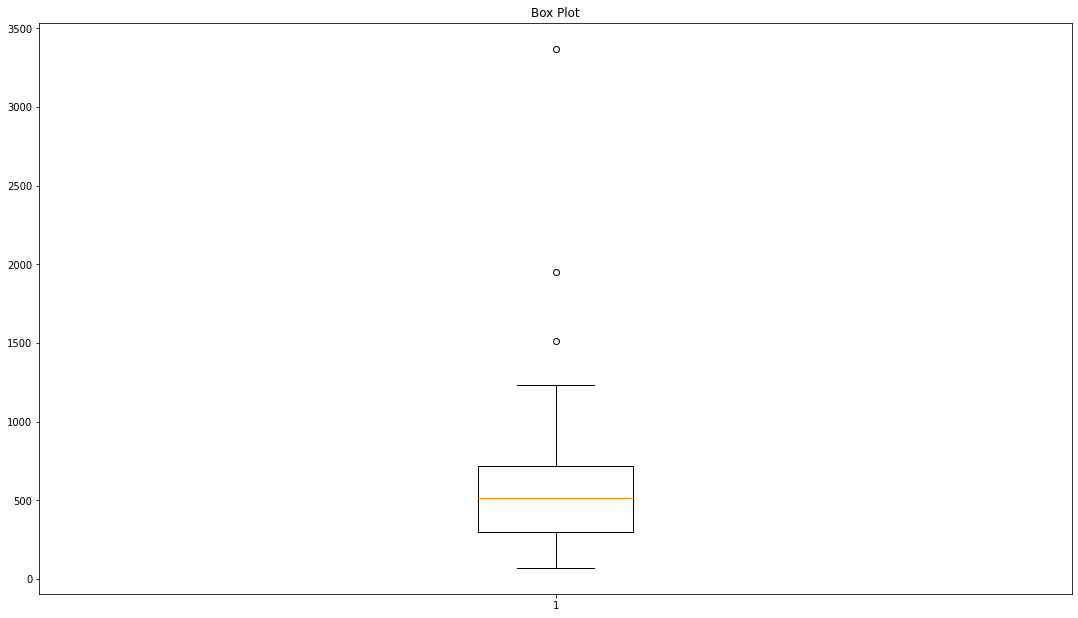

In [49]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(18.5, 10.5)
ax1.set_title('Box Plot')
ax1.boxplot(df_usairpol.popul)

Bivariate boxplot is a 2D analogue of boxplot for univariate data. It shows the distributional properties of the data and identifies possible *outliers*. It is based on calculating the 'robust' measures of location, scale and correlation; it consists of pair of concentric ellipses, one is the *hinge* (including 50% of data) and the other called *fence* (approximately 99% confidence bound) delineates outliers. 

Regression lines of both y on x and x on y with intersection showing bivariate location estimator; Acute angle between regression lines will be small for a large absolute value of correlations and large for a small one.

In the next plot, we create a scatterplot of manufacturing versus population including a bivariate boxplot. We are going to see if Chicago, Detroit, Cleveland, Philadelphia, and Houston are outliers.  
**Outliers can distort correlation**


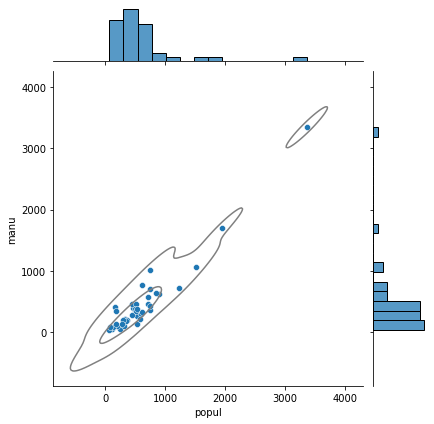

In [50]:
g = sns.jointplot(x = 'popul', y = 'manu', data = df_usairpol)
g.plot_joint(sns.kdeplot, color = 'grey', levels = 3)

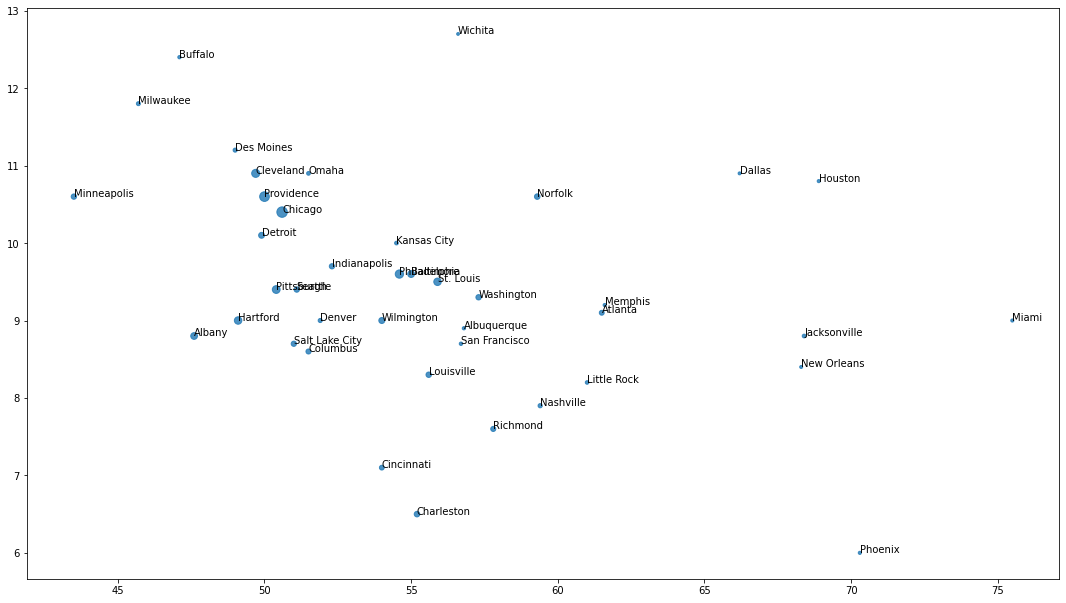

In [51]:
# Bubble plot
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter('temp', 'wind', 
             s='SO2',
             alpha=0.8, 
             data=df_usairpol)
for i, txt in enumerate(df_usairpol.iloc[:,0]):
    ax.annotate(txt, (df_usairpol.temp[i], df_usairpol.wind[i]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13e3713c8>,
      dtype=object)

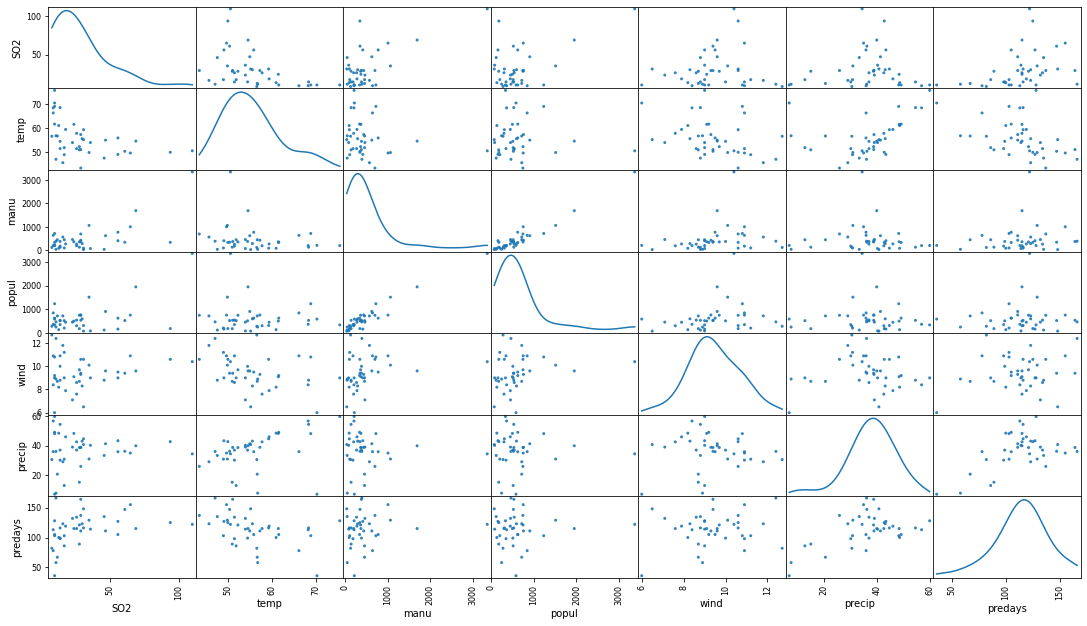

In [52]:
scatter_matrix(df_usairpol, alpha = 0.9, figsize = (18.5, 10.5), diagonal = 'kde')

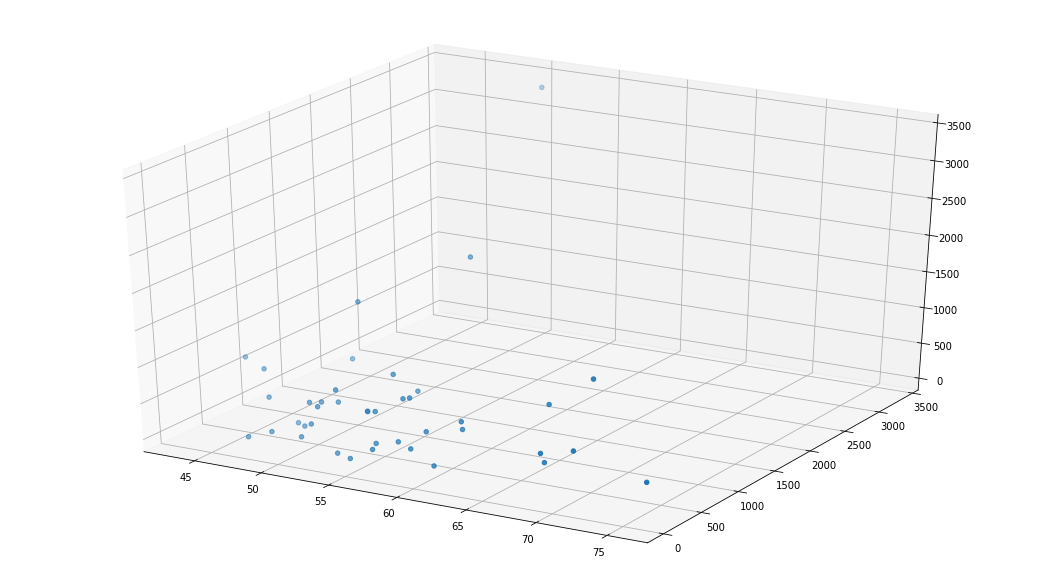

In [53]:
fig, ax = plt.subplots()
ax = plt.axes(projection='3d')
fig.set_size_inches(18.5, 10.5)
ax.scatter3D(df_usairpol.temp, df_usairpol.manu, df_usairpol.popul)


### Multivariate Density Plots

(array([1., 0., 1., 1., 1., 1., 0., 0., 2., 1.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ]),
 <a list of 10 Patch objects>)

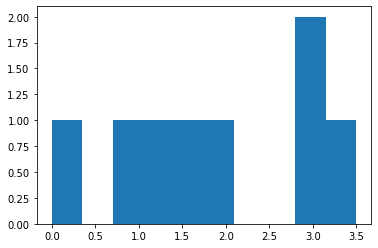

In [54]:
x = [0, 1, 1.1, 1.5, 1.9, 2.8, 2.9, 3.5]
plt.hist(x)

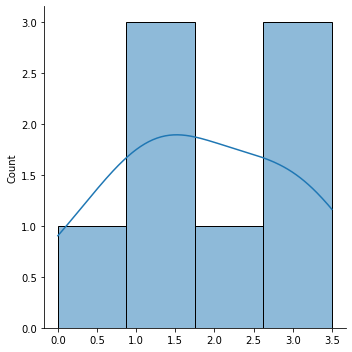

In [55]:
sns.displot(x, kde=True);

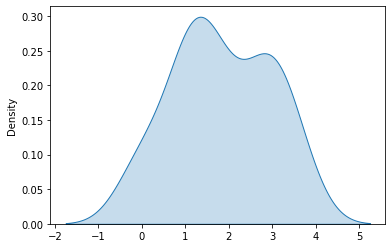

In [56]:
sns.kdeplot(x , bw = 0.5 , fill = True)

In [57]:
df_CYGOB1 = pd.read_csv('dataset/CYGOB1.csv')
df_CYGOB1.head()

,Unnamed: 0,logst,logli
0,"[1,]",4.37,5.23
1,"[2,]",4.56,5.74
2,"[3,]",4.26,4.93
3,"[4,]",4.56,5.74
4,"[5,]",4.30,5.19


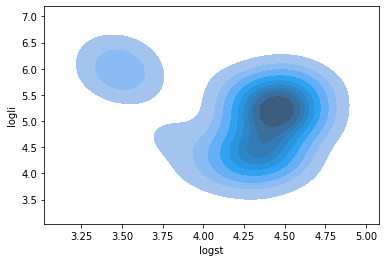

In [58]:
sns.kdeplot(df_CYGOB1.logst, df_CYGOB1.logli , fill = True)
plt.show()

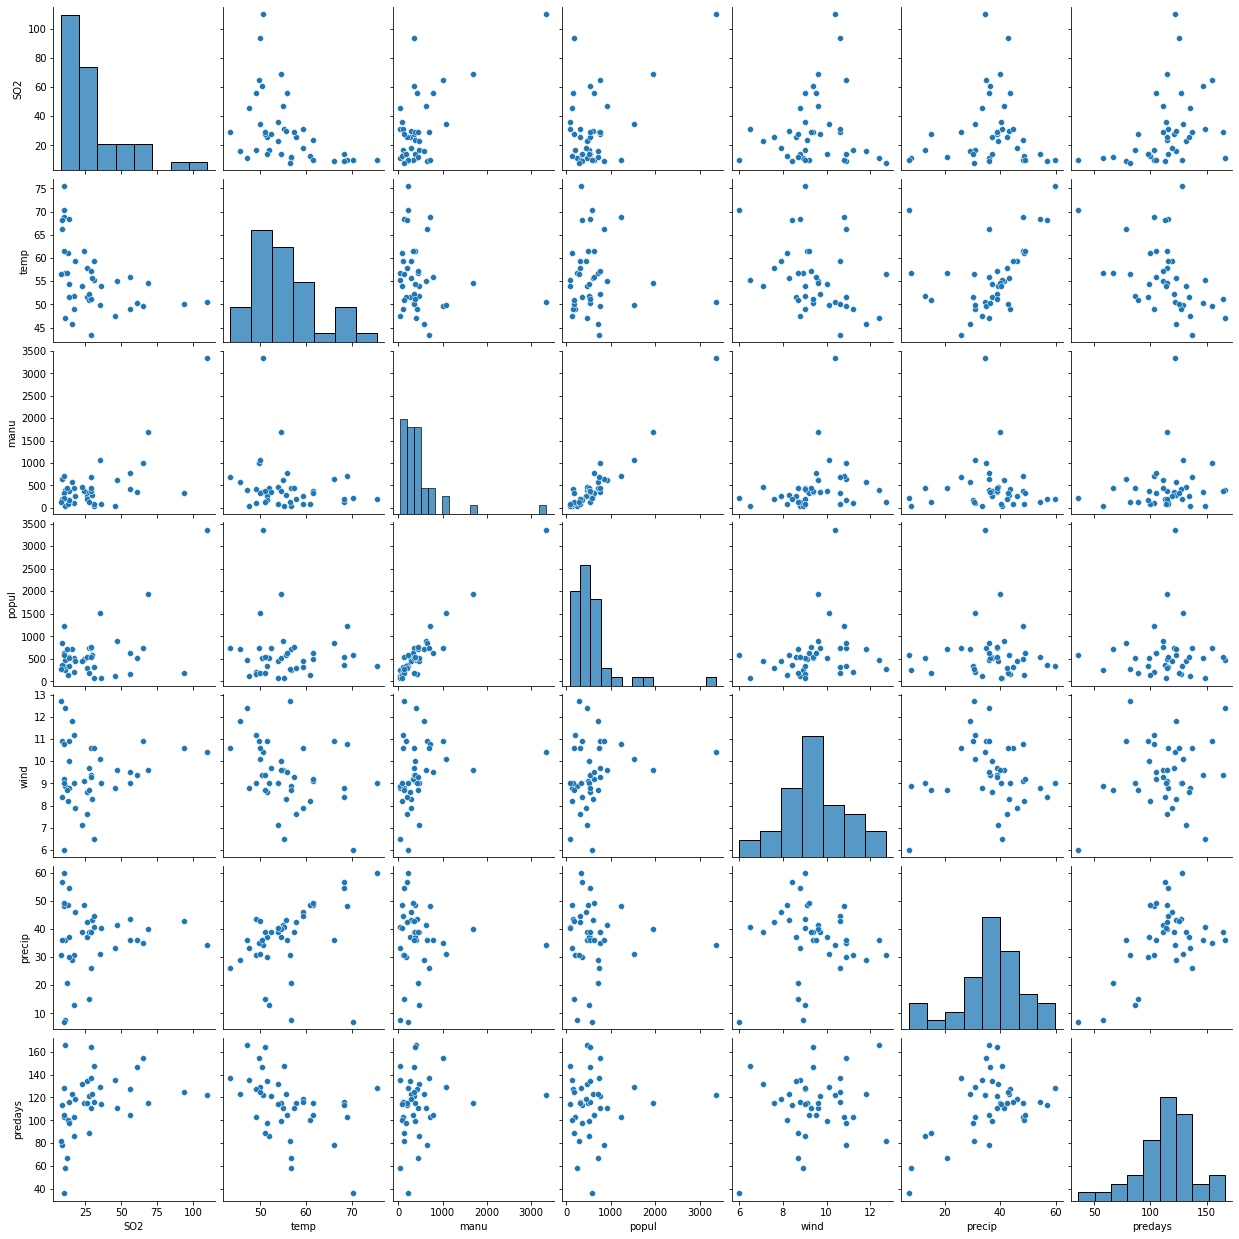

In [59]:
sns.pairplot(data=df_usairpol)

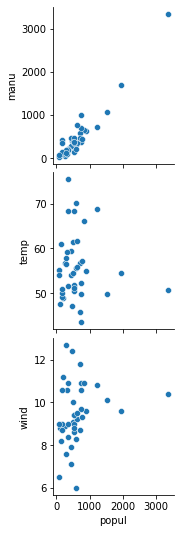

In [60]:
sns.pairplot(data=df_usairpol,
                  x_vars=['popul'],
                  y_vars=['manu', 'temp', 'wind'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x145fb5710>,
      dtype=object)

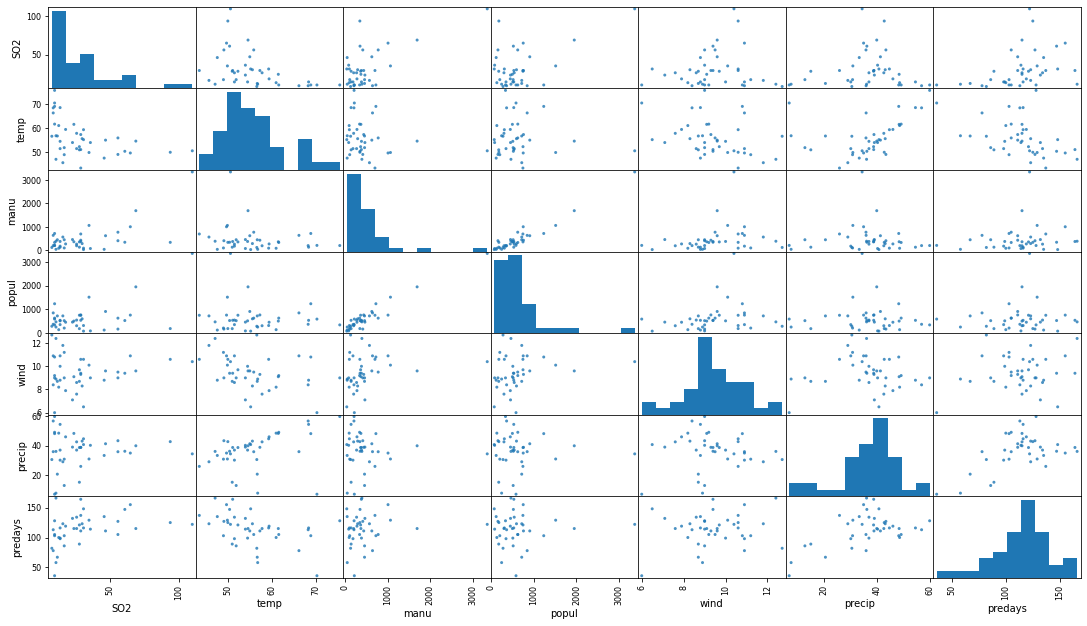

In [66]:
pd.plotting.scatter_matrix(df_usairpol, alpha=0.8, figsize = (18.5, 10.5))